# Simple Function Approximation with PyTorch

This notebook demonstrates the use of PyTorch, a powerful open-source machine learning library, for approximating simple functions. The goal is to understand the basics of PyTorch and how it can be used to build and train neural networks. 

This notebook is ideal for beginners who want to get hands-on experience with PyTorch and understand its basic functionality in the context of function approximation.

In the following code block, we import the necessary libraries for our notebook. This includes NumPy for numerical operations, PyTorch for building and training the neural network, Matplotlib for plotting, a utility module for additional plotting functions, and the time module for timing our training process.

In [1]:
# Import NumPy for numerical operations
import numpy as np

# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import a utility module for additional plotting functions
import utils_plots

# Import the time module to time our training process
import time

This cell defines the sine function to approximate, generates training data with evenly spaced values, creates a plot of the function.

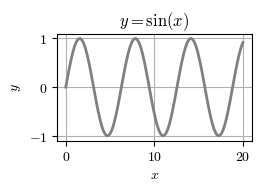

In [2]:
# Define the function to be approximated
def func(x):
    return np.sin(x)

# Generate training data in NumPy
x_np = np.linspace(0, 20, 100)  # x data (numpy array), shape=(100,)
y_np = func(x_np)  # y data (numpy array), shape=(100,)

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(2.5, 1.8))

# Plot the function
ax.plot(x_np, y_np, color='gray', linewidth=2)

# Set the labels for the x and y axes
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Display the grid
ax.grid(True)

# Set the title for the plot
ax.set_title(r'$y=\sin(x)$')

# Save the plot as a PDF file in the 'imgs' directory
fig.savefig('imgs/1_sine_function.png', format='png')

# Display the plot
plt.show()

This cell converts the `x_np` and `y_np` NumPy arrays to PyTorch tensors, adding an extra dimension for PyTorch compatibility.

In [3]:
# Convert the NumPy arrays to PyTorch tensors and add an extra dimension
input_data = torch.from_numpy(x_np).float().unsqueeze(-1)  # Convert x data to a PyTorch tensor
y = torch.from_numpy(y_np).float().unsqueeze(-1)  # Convert y data to a PyTorch tensor

This cell defines a simple neural network with three fully connected layers. The network is designed to take a single input and produce a single output. The first two layers use the hyperbolic tangent (`tanh`) activation function, while the output layer has no activation function. An instance of this network is created, and the Adam optimizer and Mean Squared Error loss function are set up for training.

In [4]:
# Define a neural network class with three fully connected layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 10)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = self.output_layer(x)
        return x
    
# Create an instance of the neural network
neural_net = NeuralNetwork()

# Define an optimizer (Adam) for training the network
optimizer = optim.Adam(neural_net.parameters(), lr=0.01)

# Define a loss function (Mean Squared Error) for training the network
loss_func = nn.MSELoss()

This cell trains the neural network for 10_000 iterations, storing the loss values and printing them every 1000 iterations. It also measures the training time. After training, it saves a summary of the training process, including the training time, number of iterations, initial and final loss, neural network architecture, optimizer used, and learning rate, to a text file.

In [5]:
# Initialize a list to store the loss values
loss_values = []

# Start the timer
start_time = time.time()

# Training the neural network
for i in range(10_001):
    prediction = neural_net(input_data)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    
    # Append the current loss value to the list
    loss_values.append(loss.item())
    
    if i % 100 == 0:  # print every 100 iterations
        print(f"Iteration {i}: Loss {loss.item()}")
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()

# Stop the timer and calculate the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

    
# Save a summary of the training process to a text file
with open("summaries/1_Simple_Function_Aproximation.txt", "w") as file:
    file.write("Summary of Neural Network Training\n")
    file.write("=================================\n\n")
    file.write(f"Neural Network Architecture:\n{neural_net}\n\n")
    file.write(f"Optimizer Used:\n{type(optimizer).__name__}\n\n")
    file.write(f"Learning Rate:\n{optimizer.param_groups[0]['lr']}\n\n")
    file.write(f"Number of Iterations:\n{len(loss_values)}\n\n")
    file.write(f"Initial Loss:\n{loss_values[0]}\n\n")
    file.write(f"Final Loss:\n{loss_values[-1]}\n\n")
    file.write(f"Training Time:\n{elapsed_time} seconds\n\n")
    
    # Calculate the average loss
    average_loss = sum(loss_values) / len(loss_values)
    file.write(f"Average Loss:\n{average_loss}\n\n")
    
    # Find the iteration with the minimum loss
    min_loss_value = min(loss_values)
    min_loss_iteration = loss_values.index(min_loss_value)
    file.write(f"Minimum Loss:\n{min_loss_value} at iteration {min_loss_iteration}\n\n")    

Iteration 0: Loss 0.5369510650634766
Iteration 100: Loss 0.37156713008880615
Iteration 200: Loss 0.3330129384994507
Iteration 300: Loss 0.31581154465675354
Iteration 400: Loss 0.3162197172641754
Iteration 500: Loss 0.3027128577232361
Iteration 600: Loss 0.29891613125801086
Iteration 700: Loss 0.29596570134162903
Iteration 800: Loss 0.2943740487098694
Iteration 900: Loss 0.29106637835502625
Iteration 1000: Loss 0.2891898453235626
Iteration 1100: Loss 0.2863306403160095
Iteration 1200: Loss 0.28009703755378723
Iteration 1300: Loss 0.2782738208770752
Iteration 1400: Loss 0.2771228551864624
Iteration 1500: Loss 0.2760406732559204
Iteration 1600: Loss 0.27497532963752747
Iteration 1700: Loss 0.3024907410144806
Iteration 1800: Loss 0.2567492425441742
Iteration 1900: Loss 0.2516416311264038
Iteration 2000: Loss 0.24707342684268951
Iteration 2100: Loss 0.24260187149047852
Iteration 2200: Loss 0.2399282455444336
Iteration 2300: Loss 0.23709282279014587
Iteration 2400: Loss 0.2432294338941574
It

In the following code block, we plot the loss values recorded during the training process. This plot helps us visualize how the loss decreases over time, indicating that our neural network is learning to approximate the wave function more accurately with each iteration.

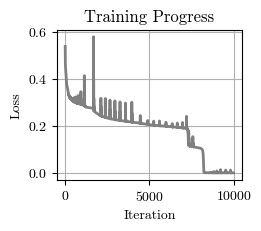

In [6]:
# Create a figure for the plot
fig = plt.figure(figsize=(2.5, 2.2))

# Plot the loss values recorded during training
plt.plot(loss_values, color='gray', linewidth=2)

# Set the labels for the x and y axes
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Set the title for the plot
plt.title('Training Progress')

# Display the grid
plt.grid(True)

# Save the plot as a PDF file in the 'imgs' directory
fig.savefig('imgs/1_Training_Progress_Simple_Function_Aproximation.png', format='png')

# Display the plot
plt.show()

In the following code block, we save the trained model's parameters to a file. We then initialize a new instance of the neural network and load the saved parameters into this new instance. This allows us to reuse the trained model without having to retrain it.

In [7]:
# Save the trained model's parameters to a file
torch.save(neural_net.state_dict(), 'models/1_Simple_Function_Aproximation.pth')

# Initialize a new instance of the neural network
new_neural_net = NeuralNetwork()

# Load the saved parameters into the new instance of the neural network
new_neural_net.load_state_dict(torch.load('models/1_Simple_Function_Aproximation.pth'))

# Ensure the new neural network is in evaluation mode
new_neural_net.eval()

NeuralNetwork(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

In the following code block, we use the trained neural network to generate predictions for $y$ (`ypred`) based on the input data. We then plot these predicted $y$s  values and the difference between the predicted and actual `y` values. This allows us to visually assess the performance of our neural network.

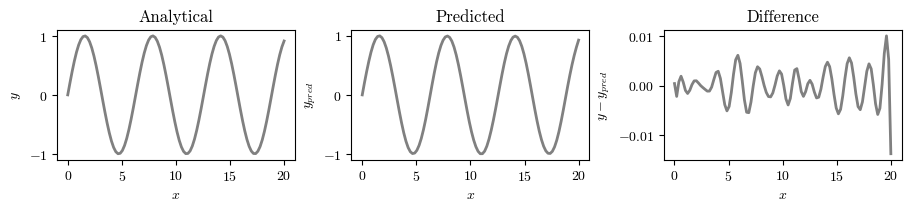

In [8]:
def plot_predictions(input_data, y_true, y_pred):
    # Convert tensors to numpy arrays for plotting
    x_np = input_data.detach().numpy()
    y_np = y_true.detach().numpy()
    ypred_np = y_pred.detach().numpy()

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 3, figsize=(9, 2))
    
    # Plot the actual y values
    axs[0].plot(x_np, y_np, color='gray', linewidth=2)
    axs[0].set_title('Analytical')
    axs[0].set_xlabel('$x$')
    axs[0].set_ylabel('$y$')    

    # Plot the predicted y values
    axs[1].plot(x_np, ypred_np, color='gray', linewidth=2)
    axs[1].set_title('Predicted')
    axs[1].set_xlabel('$x$')
    axs[1].set_ylabel('$y_{pred}$')

    # Plot the difference between the predicted and actual y values
    difference = y_np - ypred_np
    axs[2].plot(x_np, difference, color='gray', linewidth=2)
    axs[2].set_title('Difference')
    axs[2].set_xlabel('$x$')
    axs[2].set_ylabel('$y - y_{pred}$')

    # Save the plot as a PNG file in the 'imgs' directory
    fig.savefig(f'imgs/1_Predicted_and_Difference_Simple_Function_Aproximation.png', format='png')

    # Display the plot
    plt.show()
    
# Generate predictions using the neural network
ypred = neural_net(input_data)

# Plot the predictions and the difference
plot_predictions(input_data, y, ypred)    